<a href="https://colab.research.google.com/github/bilaslsa/PRAKTIKUM_MACHINE_LEARNING_SEMESTER3/blob/main/Mandiri13/PraktikumMandiri13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
# Tahap Persiapan Lingkungan (Environment Setup)
!pip install kaggle

In [128]:
# Tahap Load Data & Preprocessing
kaggle = '/content/kaggle.json'

In [129]:
# Standar wajib untuk mengaktifkan API Kaggle di lingkungan Linux (seperti Google Colab) agar aman dan berfungsi.
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [130]:
# Tahap verifikasi untuk memastikan konfigurasi keamanan telah berhasil diterapkan
!ls -l ~/.kaggle

total 4
-rw------- 1 root root 73 Dec 21 08:14 kaggle.json


In [131]:
# Mengunduh dataset secara otomatis dari server Kaggle ke dalam Google Colab
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
handwritten-digits-0-9.zip: Skipping, found more recently modified local copy (use --force to force download)


In [132]:
# Tahap Pengumpulan Data (Data Acquisition) dalam pipeline Machine Learning
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = "dataset"
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [133]:
# Tahap Verifikasi dan Eksplorasi Data.
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [134]:
# 8.	Eksplorasi Data (Data Exploration)
len(data_0)

2236

In [135]:
# Import library
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [136]:
# TAHAP 1: LOAD DATASET & PREPROCESSING GAMBAR
# ==============================================================================
print("--- 1. Memulai Proses Loading Data ---")

# Konfigurasi
base_path = '/content/dataset'  # Sesuaikan dengan lokasi folder Anda
IMG_SIZE = 28 # Standar ukuran MNIST

X_raw = []
y_raw = []

--- 1. Memulai Proses Loading Data ---


In [137]:
# Loop untuk membaca folder 0-9
for label in range(10):
    folder_path = os.path.join(base_path, str(label))
    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        count = 0
        for file in files:
            try:
                img_path = os.path.join(folder_path, file)

                # A. Baca gambar mode Grayscale
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img_array is not None:
                    # B. INVERT WARNA (PENTING UNTUK DATA MANUAL)
                    # Mengubah Latar Putih (255) jadi Hitam (0) agar mirip MNIST asli
                    img_inverted = cv2.bitwise_not(img_array)

                    # C. Resize ke 28x28 pixel
                    resized = cv2.resize(img_inverted, (IMG_SIZE, IMG_SIZE))

                    # D. Flattening (Ubah matriks 2D jadi vektor 1D)
                    X_raw.append(resized.flatten())
                    y_raw.append(label)
                    count += 1
            except Exception as e:
                pass
        print(f"   > Label {label}: {count} gambar berhasil di-load.")

   > Label 0: 2236 gambar berhasil di-load.
   > Label 1: 2241 gambar berhasil di-load.
   > Label 2: 2233 gambar berhasil di-load.
   > Label 3: 2202 gambar berhasil di-load.
   > Label 4: 2179 gambar berhasil di-load.
   > Label 5: 2126 gambar berhasil di-load.
   > Label 6: 2121 gambar berhasil di-load.
   > Label 7: 2116 gambar berhasil di-load.
   > Label 8: 2085 gambar berhasil di-load.
   > Label 9: 2016 gambar berhasil di-load.


In [138]:
# Konversi ke Numpy Array
X = np.array(X_raw)
y = np.array(y_raw)

In [139]:
# ==============================================================================
# TAHAP 2: NORMALISASI & SPLITTING DATA
# ==============================================================================
print("\n--- 2. Normalisasi & Splitting Data ---")

# A. Normalisasi (Scaling): Ubah rentang pixel 0-255 menjadi 0-1
X = X / 255.0


--- 2. Normalisasi & Splitting Data ---


In [140]:
# B. One-Hot Encoding Label Target
# Contoh: Angka 5 menjadi [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y = to_categorical(y, 10)

In [141]:
# C. Split Data (80% Training, 20% Testing) [cite: 346-356]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"   > Data Training: {X_train.shape[0]} sampel")
print(f"   > Data Testing : {X_test.shape[0]} sampel")

   > Data Training: 17244 sampel
   > Data Testing : 4311 sampel


In [142]:
# TAHAP 3: MEMBANGUN ARSITEKTUR ANN (MODELING)
# ==============================================================================
print("\n--- 3. Membangun Arsitektur Model ANN ---")

model = Sequential()

# Input Layer (784 fitur dari 28x28 pixel)
model.add(Input(shape=(IMG_SIZE * IMG_SIZE,)))


--- 3. Membangun Arsitektur Model ANN ---


In [143]:
# Hidden Layer 1: 512 Neuron (Kapasitas besar untuk belajar pola)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2)) # Mengurangi Overfitting [cite: 388]

In [144]:
# Hidden Layer 2: 256 Neuron
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

In [145]:
# Output Layer: 10 Neuron (0-9) dengan Softmax untuk Multi-class [cite: 49]
model.add(Dense(10, activation='softmax'))

# Compile Model
# Optimizer: Adam [cite: 437]
# Loss: Categorical Crossentropy (Wajib untuk >2 kelas)
# Metrics: Accuracy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [146]:
# TAHAP 4: TRAINING MODEL
print("\n--- 4. Training Model ---")

# Early Stopping: Mencegah overfitting jika loss tidak turun lagi [cite: 455]
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,      # Batas maksimum epoch
    batch_size=32,
    validation_split=0.2, # 20% dari training dipakai untuk validasi [cite: 542]
    callbacks=[early_stop],
    verbose=1
)


--- 4. Training Model ---
Epoch 1/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4149 - loss: 1.7378 - val_accuracy: 0.7202 - val_loss: 0.9298
Epoch 2/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7714 - loss: 0.7420 - val_accuracy: 0.8344 - val_loss: 0.5351
Epoch 3/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8734 - loss: 0.4050 - val_accuracy: 0.8634 - val_loss: 0.4286
Epoch 4/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9173 - loss: 0.2653 - val_accuracy: 0.8695 - val_loss: 0.4074
Epoch 5/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9478 - loss: 0.1810 - val_accuracy: 0.8707 - val_loss: 0.3991
Epoch 6/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9531 - loss: 0.1487 - val_accuracy: 0.8721 - val_loss: 0.4092
Epoch 7/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9621 - loss: 0.1213 - val_accuracy: 0.8875 - val_loss: 0.3789
Epoch 8/100
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.96


--- 5. Evaluasi & Visualisasi ---
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8884 - loss: 0.4066

[HASIL AKHIR] Test Accuracy: 89.31% | Test Loss: 0.3937


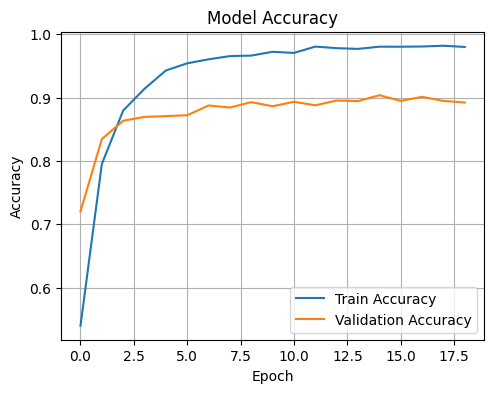

In [147]:
# TAHAP 5: EVALUASI & VISUALISASI HASIL
# ==============================================================================
print("\n--- 5. Evaluasi & Visualisasi ---")
# Evaluasi pada Data Test [cite: 548]
loss, acc = model.evaluate(X_test, y_test)
print(f"\n[HASIL AKHIR] Test Accuracy: {acc*100:.2f}% | Test Loss: {loss:.4f}")
# Visualisasi Grafik (Sesuai Modul Halaman 15)
plt.figure(figsize=(12, 4))
# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

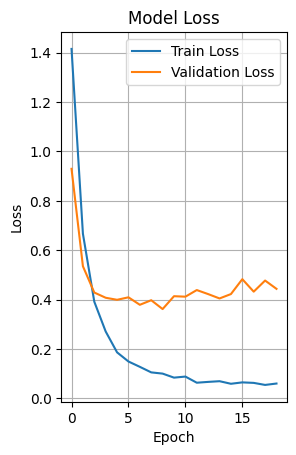

In [148]:
# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

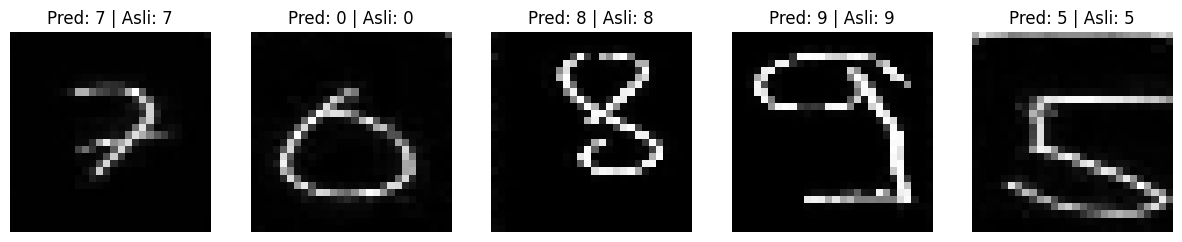

In [149]:
# PREDIKSI (OPTIONAL)
# ==============================================================================
# Mengambil 5 gambar acak dari data test untuk dilihat prediksinya
indices = np.random.randint(0, len(X_test), 5)
plt.figure(figsize=(15, 3))

for i, idx in enumerate(indices):
    image = X_test[idx].reshape(1, -1) # Reshape untuk prediksi
    prediction = model.predict(image, verbose=0)
    predicted_label = np.argmax(prediction)
    true_label = np.argmax(y_test[idx])

    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_label} | Asli: {true_label}")
    plt.axis('off')

plt.show()

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


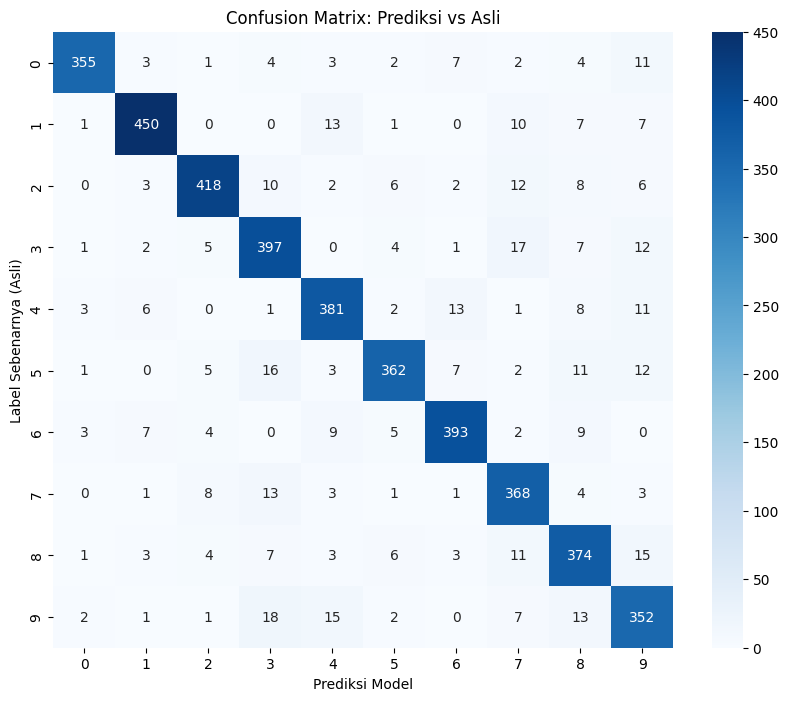

In [150]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediksi seluruh data testing
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Membuat Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualisasi dengan Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix: Prediksi vs Asli')
plt.xlabel('Prediksi Model')
plt.ylabel('Label Sebenarnya (Asli)')
plt.show()